In a manufacture of mechanical devices for the automotive industry, the production of a gearbox is done by a line of 3 successive working stations. The production of a new gearbox starts only when the previous one is fully assembled. In what follows, the assembly time of one gearbox is denoted by $T$. Also, $T_k$ is the assembly time at machine $k$. Finally $\mu_k = \mathbb{E}(T_k)$ and $\sigma^2_k = \mathbb{V}(T)$. Details about the production line are provided in the graph below.

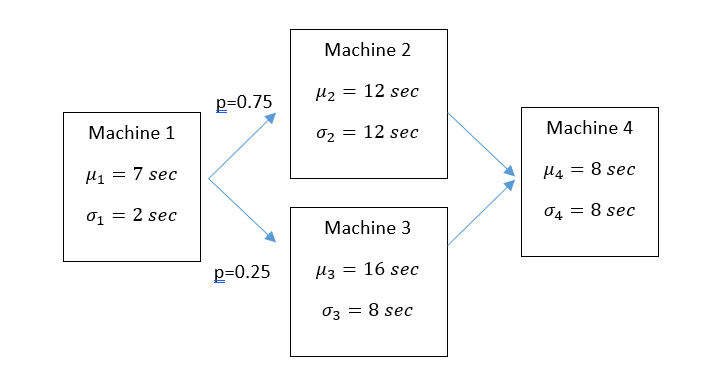

where $p=0.75$ indicates for example that the output of machine 1 ends up in machine 2 with probability $0.75$. 

------------------------------------------------------------------------------------------------------

1.	For each machine $k$, choose a (non-Gaussian) statistical distribution for the assembly time $T_k$ and provide value(s) for its parameter(s).

------------------------------------------------------------------------------------------------------

### Machine 1
Gamma distribution

Parameters: $\alpha _1 = \frac{\mu_1^2}{\sigma_1^2} = \frac{49}{4} = 12.25$ and $\beta _1 = \frac{\sigma_1^2}{\mu_1} = \frac{4}{7} \approx 0.571$

### Machine 2
Exponential distribution

Parameters: $\alpha _2 = \frac{\mu_2^2}{\sigma_2^2} = \frac{144}{144} = 1$ and $\beta _2 = \frac{\sigma_2^2}{\mu_2} = \frac{144}{12} = 12$

### Machine 3
Gamma distribution

Parameters: $\alpha _3 = \frac{\mu_3^2}{\sigma_3^2} = \frac{256}{64} = 4$ and $\beta _3 = \frac{\sigma_3^2}{\mu_3} = \frac{64}{16} = 4$

### Machine 4
Exponential distribution

Parameters: $\alpha _4 = \frac{\mu_4^2}{\sigma_4^2} = \frac{64}{64} = 1$ and $\beta _4 = \frac{\sigma_4^2}{\mu_4} = \frac{64}{8} = 8$

------------------------------------------------------------------------------------------------------------------------

b) Calculate the expected time for assembling one gearbox, $\mathbb{E}(T)$.

------------------------------------------------------------------------------------------------------------------------

$\mathbb{E}(T)$ = $\mu 1 + 0.75 \times \mu 2 + 0.25 \times \mu 3 + \mu 4$ = 28s

------------------------------------------------------------------------------------------------------

2. Simulate 5000 durations  $T$  for assembling one single gearbox and report the mean (check that its is well close to the expectation of question 1), standard deviation, 5% and 95% percentile. Plot an histogram. Save the simulated durations in a file "sample.csv".

------------------------------------------------------------------------------------------------------

27.86806382506653
14.240489951815675
10.515733841812674
54.22073999285808


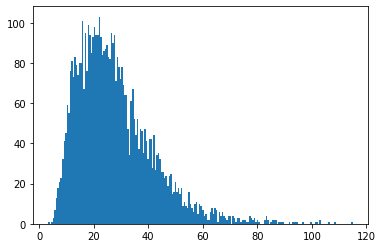

In [6]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt

m = [7, 12, 16, 8]
s = [2, 12, 8, 8]
alpha = np.array(m) * np.array(m) / (np.array(s) * np.array(s))
beta = np.array(s) * np.array(s) / np.array(m)

time = np.zeros(5000)

for i in range(0, 5000):
    time[i] += random.gammavariate(alpha[0], beta[0])
    p = random.choice([1, 1, 1, 2])
    time[i] += random.gammavariate(alpha[p], beta[p])
    time[i] += random.gammavariate(alpha[3], beta[3])

mean = time.sum() / time.size
print(mean)
deviation = time.std()
print(deviation)
perc_5 = np.percentile(time, 5)
print(perc_5)
perc_95 = np.percentile(time, 95)
print(perc_95)

plt.hist(time, bins=200)

f = open('sample.csv', 'w')
writer = csv.writer(f)
writer.writerow(time)
f.close()


------------------------------------------------------------------------------------------------------


3. a) Load simulated data from the file "sample.csv". Fit the exponential, gamma and chi-square distributions and estimate their parameters by log-likelihood maximization. Select the best non-Gaussian statistical distribution for  $T$. Justify your choice.

Rem: if you use scipy, set the location parameter to zero with option 'floc=0'.

------------------------------------------------------------------------------------------------------

We chose the gamma distribution because it is more representative of the data as it is wider but grows less in the middle compared to the chi-squared. The exponential just doesn't seem to accurately represent the data.

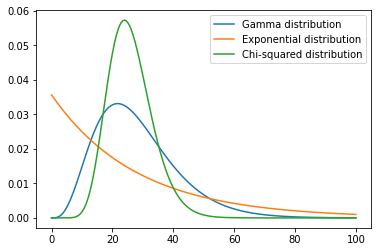

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

f = open('sample.csv', 'r')
reader = csv.reader(f)
x = np.linspace(0, 100, 500, endpoint=True)

for data in reader:
    if len(data) == 0:
        continue

    for i in range(len(data)):
        data[i] = float(data[i])
    data = np.array(data)

    gamma = scipy.stats.gamma.fit(data, floc=0)
    exp = scipy.stats.expon.fit(data, floc = 0)
    chi = scipy.stats.chi2.fit(data, fscale=1, floc=0)

    plt.plot(x, scipy.stats.gamma.pdf(x, gamma[0], loc=gamma[1], scale=gamma[2]), label="Gamma distribution")
    plt.plot(x, scipy.stats.expon.pdf(x, loc=exp[0], scale=exp[1]), label="Exponential distribution")
    plt.plot(x, scipy.stats.chi2.pdf(x, chi[0], loc=chi[1], scale=chi[2]), label="Chi-squared distribution")
    plt.legend()
    plt.show()
f.close()

b) During the lectures, we have seen that the chi-square distribution has only one single parameter (the number of degrees of freedom). In Scipy, we find two other parameters location "loc" and scale "scale". Why? 

To determine where we put the start of the distribution, its location. And to rescale it if it is needed / to force a scale to the graph.

------------------------------------------------------------------------------------------------------

c) Compare the empirical distribution with the distribution you chose at 3a). For this purpose, plot an histogram of  durations and add the probability density function (pdf) that you have selected for modelling the random variable.

------------------------------------------------------------------------------------------------------

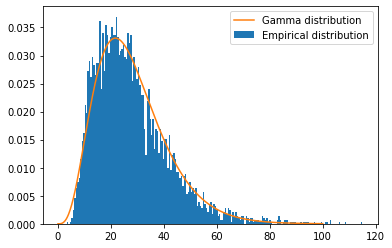

In [7]:
plt.hist(time, bins=200, density=True, label="Empirical distribution")
plt.plot(x, scipy.stats.gamma.pdf(x, gamma[0], loc=gamma[1], scale=gamma[2]), label="Gamma distribution")
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------

4. We want to fit a Weibull distribution to $T$. The density, $f(t)$, depends upon two parameters $\alpha>0$ and $\lambda>0$ and is given by:

$$ f(t)=\lambda \alpha t^{\alpha-1} \exp(-\lambda t^\alpha) $$

a) Write two functions: one for the density and one that computes the log-likelihood of a sample of durations for this distribution. Test this function on the simulated dataset and for $\alpha=1$ and $\lambda=\frac{1}{28}$

------------------------------------------------------------------------------------------------------

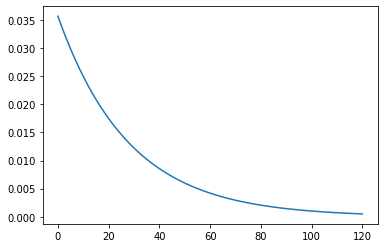

In [14]:
def density(alpha, gamma, t):
    return gamma*alpha*(t**(alpha-1))*(np.exp(-gamma*(t**alpha)))

def log_likelihood(alpha, gamma, t):
    return np.log(density(alpha, gamma, t))

t = np.linspace(0, 120, 500)
f = density(1, 1/28, t)
l = log_likelihood(1, 1/28, t)
plt.plot(t, f)
plt.show()


------------------------------------------------------------------------------------------------------

b) Maximize the log-likelihood to find estimates $\hat{\alpha}$ and $\hat{\lambda}$. Next compare the log-likelihood with those computed previously. Is this model better?

Hint: use the "scipy.optimize" package and the function "minimize". To avoid adding constraints, you can do a change of variables: $\alpha=\exp(a)$ and $\lambda=\exp(b)$. The function "minimize" may send back a warning (division by zero in log) but converges well to the solution.

------------------------------------------------------------------------------------------------------

In [5]:
#code here


------------------------------------------------------------------------------------------------------

c) The expectation and variance of the Weibull distribution are 
$$ \mathbb{E}(T)=\lambda^{-\frac{1}{\alpha}}\Gamma(\frac{1}{\alpha}+1) $$

$$ \mathbb{V}(T)=\lambda^{-\frac{2}{\alpha}} \left(  \Gamma(\frac{2}{\alpha}+1) -\Gamma(\frac{1}{\alpha}+1)^2  \right) $$

Estimate $\alpha$  and $\lambda$ by the methods of moments. Next calculate the log-likelihood with these estimates and compare with these obtained by log-likelihood maximization. Is the result surprising ?

Hint: use the scipy.optimize package and the function "root". The gamma function is scipy.special.gamma(z)

------------------------------------------------------------------------------------------------------

In [6]:
#code here


------------------------------------------------------------------------------------------------------

5.	Based on the content of the “Self-learning 2”, Bootstrap 1000 times the sample of durations simulated in Question 2 (stored in the file "sample.csv") and compute, the mean, standard deviation and 95% and 90% confidence interval for parameter(s) estimate(s). Plot the empirical distribution of parameter(s).

------------------------------------------------------------------------------------------------------

In [7]:
#code here


-----------------------------------------------------------------------------------------------------

6. Using simulated assembling times, determine the probability that assembling 10 gearboxes lasts less than 320 seconds $P(T\leq 320\,sec)$. 

------------------------------------------------------------------------------------------------------

In [8]:
#code here


------------------------------------------------------------------------------------------------------

7. Is there any alternative to numerical computing in question 6 for approximating  $P(T\leq 320\,sec)$? Please detail your answer and provide an estimate of this probability.

------------------------------------------------------------------------------------------------------

Answer here
